<h1 style = "font-size:3rem;color:orange">Reading and Visualizing Audio</h1>

Importing packages

In [1]:
import pandas as pd               # for working & analyzing data sets
import numpy as np                # for arrays & matrices
import matplotlib.pyplot as plt   # for plotting data
import seaborn as sns             # for data visualization

from glob import glob             # for importing data
import librosa                    # for working with raw audio data
import librosa.display            # 
import IPython.display as ipd     # for playing audio

Import audio files using glob

In [2]:
audio_files = glob('samples/*.wav')
print(audio_files)

['samples\\01 Mer-mistral.wav', 'samples\\02 Oiseaux exotiques.wav', 'samples\\03 Clavecin synthÇtique.wav', 'samples\\04 Oiseaux exotiques dÇbut.wav', 'samples\\05 Carillon de bois.wav', 'samples\\06 Carillon de mÇtal.wav', 'samples\\07 Mer-mistral galets.wav', 'samples\\08 Oiseaux exotiques ter.wav', 'samples\\09 Carillon de mÇtal ralenti.wav', 'samples\\10 Grillons insectes voix.wav', 'samples\\11 Arpäge harmonique.wav', 'samples\\12 Gong de synthäse.wav', 'samples\\13 Piano.wav', 'samples\\14 Arpäge harmonique Mutations.wav', 'samples\\15 Violoncelle.wav', 'samples\\16 Clavecin synthÇtique bis.wav', 'samples\\17 Arpäge harmonique ter.wav', 'samples\\18 Profils de mer.wav', 'samples\\chords&notes.wav', 'samples\\fingerSnap.wav', 'samples\\St_Nicolaes_Church.wav', 'samples\\xylofoon.wav']


Playing audio using IPython

In [3]:
ipd.Audio(audio_files[18])

Using the raw data using librosa

In [4]:
y, sr = librosa.load(audio_files[18])

sample_length = len(y) / sr
print(f'The sampling rate is {sr}')
print(f'The sample is {sample_length} sec')

The sampling rate is 22050
The sample is 30.293197278911563 sec


<AxesSubplot:title={'center':'Raw Audio'}>

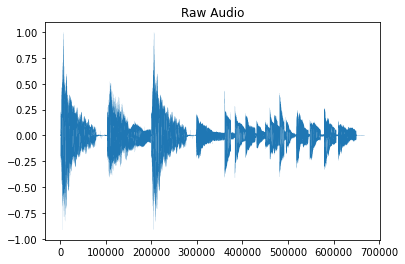

In [5]:
pd.Series(y).plot(lw=0.07,
                  title='Raw Audio')

Trimming the data

<AxesSubplot:title={'center':'Raw Trimmed Audio'}>

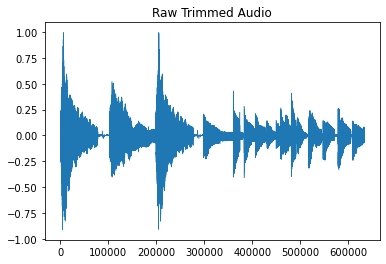

In [6]:
y_trimmed , _ = librosa.effects.trim(y, top_db = 20)
pd.Series(y_trimmed).plot(lw=0.5,
                          title='Raw Trimmed Audio')

Or zooming in on a section of the data

<AxesSubplot:title={'center':'Raw Zoomed Audio'}>

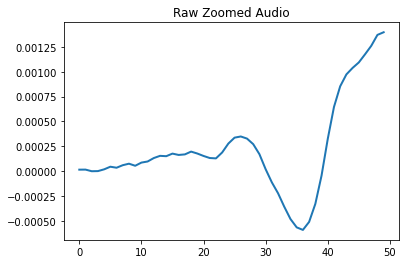

In [7]:
pd.Series(y[0:50]).plot(lw=2 , title='Raw Zoomed Audio')

Performing Fourier transform 

<AxesSubplot:title={'center':'STFT magnitude'}>

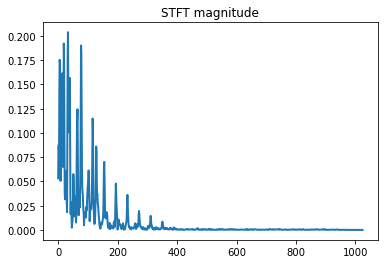

In [8]:
STFT = librosa.stft(y) # return two vectors: magnitude and phase
pd.Series(abs(STFT[:,0])).plot(lw=2, 
                               title='STFT magnitude') 

Converting to DB

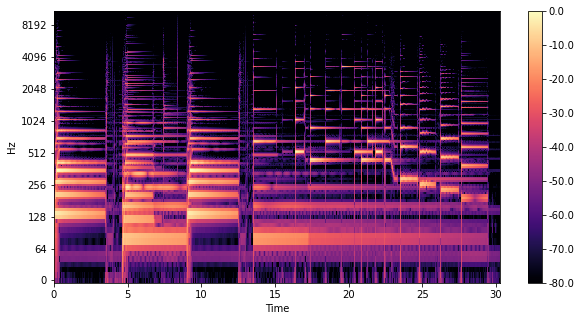

In [9]:
STFT_db = librosa.amplitude_to_db(abs(STFT), ref=np.max)
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(STFT_db,
                               y_axis='log',
                               x_axis='time', 
                               ax=ax)

fig.colorbar(img, ax = ax, format = f'%0.1f')


Creating a Mel Spectrogram (only audible frequencies)

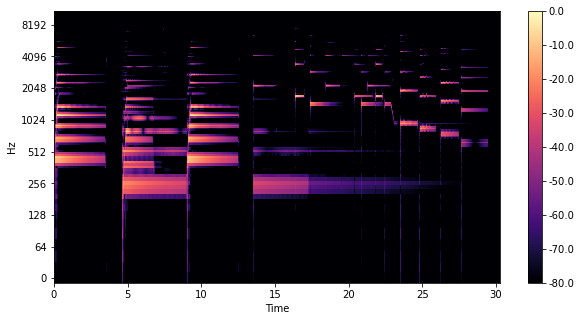

In [10]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=512)
S_db_mel = librosa.amplitude_to_db(abs(S), ref=np.max)

fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(S_db_mel,
                               y_axis='log',
                               x_axis='time', 
                               ax=ax)

fig.colorbar(img, ax = ax, format = f'%0.1f')
